In [1]:
#load packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
import statistics 
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
%matplotlib inline

/Users/farahfrancis/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/farahfrancis/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#load dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'disease_balance.csv')
data = pd.read_csv(data_path, delimiter = ',')

data.head(5)

,Disease,Global_coefficient,Glocal_efficiency,Degree_variance(heterogeneity),Modularity,Hierarchical_complexity,rich_club,Assortativity
0,AD,0.569138,0.636714,0.261647,0.227039,0.378787,0.739755,-0.090050
1,AD,0.575160,0.630307,0.240216,0.230857,0.261964,0.703501,-0.027115
2,CN,0.561343,0.637813,0.225127,0.231346,0.261439,0.675434,-0.074011
3,CN,0.568599,0.634395,0.222688,0.236187,0.143420,0.686520,-0.037257
4,AD,0.565618,0.633893,0.231078,0.236921,0.219827,0.714186,-0.056369


In [3]:
# x-features
X = pd.get_dummies(data.drop('Disease', axis = 1))
#X = pd.get_dummies(X.drop(labels = ['Global_coefficient'], axis = 1))
print(X.shape)
column_names = list(X.columns) 
print(column_names)

#y labels(AD vs CN) for train
y = data['Disease']
print(y.shape)

(78, 7)
['Global_coefficient', 'Glocal_efficiency', 'Degree_variance(heterogeneity)', 'Modularity', 'Hierarchical_complexity', 'rich_club', 'Assortativity']
(78,)


In [4]:
#split between train and validation usinf train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0, shuffle = True, stratify=y)



In [26]:
#define validation methods
#add 10 data. put test data not training
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
loo = LeaveOneOut()
kfold = KFold(n_splits=10, shuffle=True, random_state=None)


In [27]:
#upload test data
data_path = os.path.join(os.getcwd(), 'datasets', 'disease_balance_test.csv')
data_test = pd.read_csv(data_path, delimiter = ',')

# x-features
X_test = pd.get_dummies(data_test.drop('Disease', axis = 1))
#X_test = pd.get_dummies(X_test.drop(labels = ['Global_coefficient'], axis = 1))

print(X_test.shape)
column_names = list(X.columns) 
print(column_names)

#y labels(AD vs CN) for train
y_test = data_test['Disease']
print(y_test.shape)

(20, 7)
['Global_coefficient', 'Glocal_efficiency', 'Degree_variance(heterogeneity)', 'Modularity', 'Hierarchical_complexity', 'rich_club', 'Assortativity']
(20,)


In [45]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
#dt
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1000)
dt = dt.fit(X, y)
cv_results = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')
print('cross_val_score:', cv_results)
print("Accuracy: %.2f%%" % (cv_results.mean()*100.0))

prediction_test = dt.predict(X_test)
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)*100))

print(confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))

cm = confusion_matrix(y_test, prediction_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)


cross_val_score: [1.    0.875 0.875 0.75  0.875 0.875 1.    1.    1.    1.   ]
Accuracy: 92.50%
Classification accuracy on test set: 20.000
[[1 9]
 [7 3]]
             precision    recall  f1-score   support

         AD       0.12      0.10      0.11        10
         CN       0.25      0.30      0.27        10

avg / total       0.19      0.20      0.19        20

Sensitivity :  10.0
Specificity :  30.0


In [29]:
#plot DT tree
#dot_data = export_graphviz(dt, out_file=None,  
    #feature_names=column_names,                        
    #class_names=data['Disease'],  
    #filled=True, rounded=True,  
    #special_characters=False)
#graph = graphviz.Source(dot_data)
#graph

[[35  4]
 [ 2 37]]
             precision    recall  f1-score   support

         AD       0.95      0.90      0.92        39
         CN       0.90      0.95      0.92        39

avg / total       0.92      0.92      0.92        78

Sensitivity :  89.74358974358975
Specificity :  94.87179487179486


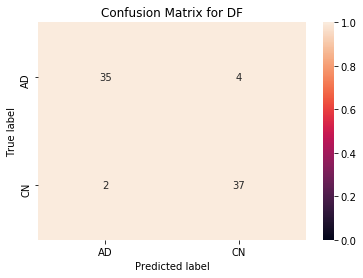

In [46]:
#CV evaluation DT
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dt, X, y, cv=skf)
#print(confusion_matrix(y, y_train_pred))
cm = confusion_matrix(y, y_train_pred)
print(cm)
print(classification_report(y, y_train_pred))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)

plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_, title='Confusion Matrix for DF')


In [57]:
rf = RandomForestClassifier(n_estimators=500, criterion='entropy')
rf = rf.fit(X, y)
cv_results = cross_val_score(rf, X, y, cv=skf, scoring='accuracy')
print('cross_val_score:', cv_results)
print("Accuracy: %.2f%%" % (cv_results.mean()*100.0))

prediction_train = dt.predict(X=X)
prediction_test = dt.predict(X=X_test)
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)*100))

print(confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))
cm = confusion_matrix(y_test, prediction_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)

column_names = list(X.columns) 
print(column_names)

dot_data = export_graphviz(rf, out_file=None,  
    feature_names=column_names,                        
    class_names=data['Disease'],  
    filled=True, rounded=True,  
    special_characters=False)
graph = graphviz.Source(dot_data)
graph

cross_val_score: [1.         0.875      1.         0.75       0.75       0.875
 1.         1.         1.         0.83333333]
Accuracy: 90.83%
Classification accuracy on test set: 20.000
[[1 9]
 [7 3]]
             precision    recall  f1-score   support

         AD       0.12      0.10      0.11        10
         CN       0.25      0.30      0.27        10

avg / total       0.19      0.20      0.19        20

Sensitivity :  10.0
Specificity :  30.0
['Global_coefficient', 'Glocal_efficiency', 'Degree_variance(heterogeneity)', 'Modularity', 'Hierarchical_complexity', 'rich_club', 'Assortativity']


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

[[36  3]
 [ 3 36]]
             precision    recall  f1-score   support

         AD       0.92      0.92      0.92        39
         CN       0.92      0.92      0.92        39

avg / total       0.92      0.92      0.92        78

Sensitivity :  92.3076923076923
Specificity :  92.3076923076923


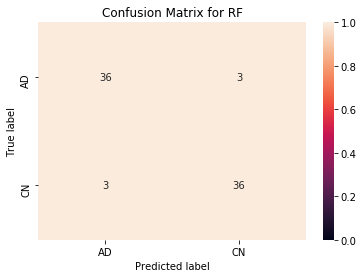

In [48]:
#CV evaluation rf
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(rf, X, y, cv=skf)
#print(confusion_matrix(y, y_train_pred))
cm = confusion_matrix(y, y_train_pred)
print(cm)
print(classification_report(y, y_train_pred))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)

plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_, title='Confusion Matrix for RF')



In [33]:
svc_linear = LinearSVC()
svc = svc_linear.fit(X, y)
cv_results = cross_val_score(svc, X, y, cv=skf, scoring='accuracy')
print('cross_val_score:', cv_results)
print("Accuracy: %.2f%%" % (cv_results.mean()*100.0))

prediction_test = svc.predict(X=X_test)
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)*100))

print(confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))

cm = confusion_matrix(y_test, prediction_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)


cross_val_score: [1.         0.625      0.875      0.625      0.75       0.625
 0.75       0.75       0.75       0.83333333]
Accuracy: 75.83%
Classification accuracy on test set: 35.000
[[4 6]
 [7 3]]
             precision    recall  f1-score   support

         AD       0.36      0.40      0.38        10
         CN       0.33      0.30      0.32        10

avg / total       0.35      0.35      0.35        20

Sensitivity :  40.0
Specificity :  30.0


[[28 11]
 [ 8 31]]
             precision    recall  f1-score   support

         AD       0.78      0.72      0.75        39
         CN       0.74      0.79      0.77        39

avg / total       0.76      0.76      0.76        78

Sensitivity :  71.7948717948718
Specificity :  79.48717948717949


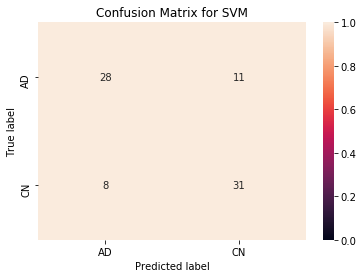

In [49]:
#CV evaluation svm
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svc, X, y, cv=skf)
#print(confusion_matrix(y, y_train_pred))
cm = confusion_matrix(y, y_train_pred)
print(cm)
print(classification_report(y, y_train_pred))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)

plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_, title='Confusion Matrix for SVM')


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X, y)
cv_results = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
print('cross_val_score:', cv_results)
print("Accuracy: %.2f%%" % (cv_results.mean()*100.0))

prediction_test = svc.predict(X=X_test)
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)*100))

print(confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))

cm = confusion_matrix(y_test, prediction_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)


cross_val_score: [1.    1.    1.    0.875 1.    0.875 0.75  1.    1.    1.   ]
Accuracy: 95.00%
Classification accuracy on test set: 35.000
[[4 6]
 [7 3]]
             precision    recall  f1-score   support

         AD       0.36      0.40      0.38        10
         CN       0.33      0.30      0.32        10

avg / total       0.35      0.35      0.35        20

Sensitivity :  40.0
Specificity :  30.0


[[36  3]
 [ 5 34]]
             precision    recall  f1-score   support

         AD       0.88      0.92      0.90        39
         CN       0.92      0.87      0.89        39

avg / total       0.90      0.90      0.90        78

Sensitivity :  92.3076923076923
Specificity :  87.17948717948718


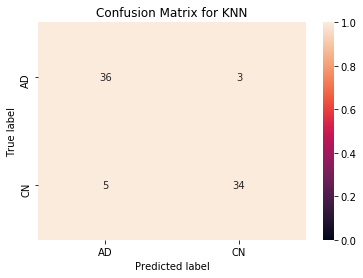

In [50]:
#CV evaluation knn
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X, y, cv=skf)
#print(confusion_matrix(y, y_train_pred))
cm = confusion_matrix(y, y_train_pred)
print(cm)
print(classification_report(y, y_train_pred))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)

plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_, title='Confusion Matrix for KNN')


In [37]:
#try with different k values
k_list = [1,2,3,4,5,6,7]
ca = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X, y)
    score = knn.score(X_test,y_test)*100
    ca.append(score)
    print('Performance on test with {} nearest neighbours: {:.3f}'.format(k, score))

Performance on test with 1 nearest neighbours: 15.000
Performance on test with 2 nearest neighbours: 35.000
Performance on test with 3 nearest neighbours: 30.000
Performance on test with 4 nearest neighbours: 35.000
Performance on test with 5 nearest neighbours: 25.000
Performance on test with 6 nearest neighbours: 20.000
Performance on test with 7 nearest neighbours: 20.000


In [61]:
#try on ANN
from sklearn.neural_network import MLPClassifier
mlp_simple = MLPClassifier(hidden_layer_sizes=(10), early_stopping=True, random_state=42)
mlp_simple.fit(X, y)
cv_results = cross_val_score(mlp_simple, X, y, cv=kfold, scoring='accuracy')
print('cross_val_score:', cv_results)
print("Accuracy: %.2f%%" % (cv_results.mean()*100.0))

prediction_test = svc.predict(X=X_test)
print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(y_test,prediction_test)*100))

print(confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))

cm = confusion_matrix(y_test, prediction_test)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)


cross_val_score: [0.375      0.75       0.625      0.125      0.5        0.375
 0.75       0.625      0.57142857 0.28571429]
Accuracy: 49.82%
Classification accuracy on test set: 35.000
[[4 6]
 [7 3]]
             precision    recall  f1-score   support

         AD       0.36      0.40      0.38        10
         CN       0.33      0.30      0.32        10

avg / total       0.35      0.35      0.35        20

Sensitivity :  40.0
Specificity :  30.0


[[39  0]
 [39  0]]
             precision    recall  f1-score   support

         AD       0.50      1.00      0.67        39
         CN       0.00      0.00      0.00        39

avg / total       0.25      0.50      0.33        78

Sensitivity :  100.0
Specificity :  0.0


/Users/farahfrancis/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


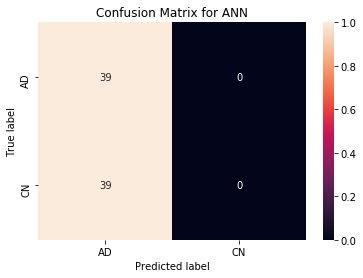

In [52]:
#CV evaluation ann
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp_simple, X, y, cv=skf)
#print(confusion_matrix(y, y_train_pred))
cm = confusion_matrix(y, y_train_pred)
print(cm)
print(classification_report(y, y_train_pred))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity*100 )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity*100)

plt.figure()
plot_confusion_matrix(cm, classes=dt.classes_, title='Confusion Matrix for ANN')


['Global_coefficient', 'Glocal_efficiency', 'Degree_variance(heterogeneity)', 'Modularity', 'Hierarchical_complexity', 'rich_club', 'Assortativity']


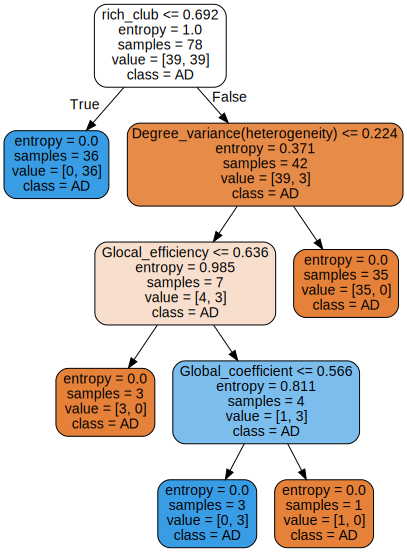

In [55]:
#plotting graph of the decision tree

column_names = list(X.columns) 
print(column_names)

dot_data = export_graphviz(dt, out_file=None,  
    feature_names=column_names,                        
    class_names=data['Disease'],  
    filled=True, rounded=True,  
    special_characters=False)
graph = graphviz.Source(dot_data)
graph

In [41]:
#feature importance
for i, column in enumerate(column_names):
    if dt.feature_importances_[i] > 0:
        print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))


Importance of feature Global_coefficient:, 0.042
Importance of feature Glocal_efficiency:, 0.047
Importance of feature Degree_variance(heterogeneity):, 0.111
Importance of feature rich_club:, 0.800


In [42]:
#defining confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(dt, X, y, cv=loo)
cm = confusion_matrix(y, y_pred)
print(cm)
#plt.figure()
#(cm, classes = dt.classes_, title='Test confusion')

[[36  3]
 [ 2 37]]


In [23]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y, y_pred, average=None)

(array([0.94736842, 0.925     ]),
 array([0.92307692, 0.94871795]),
 array([0.93506494, 0.93670886]),
 array([39, 39]))

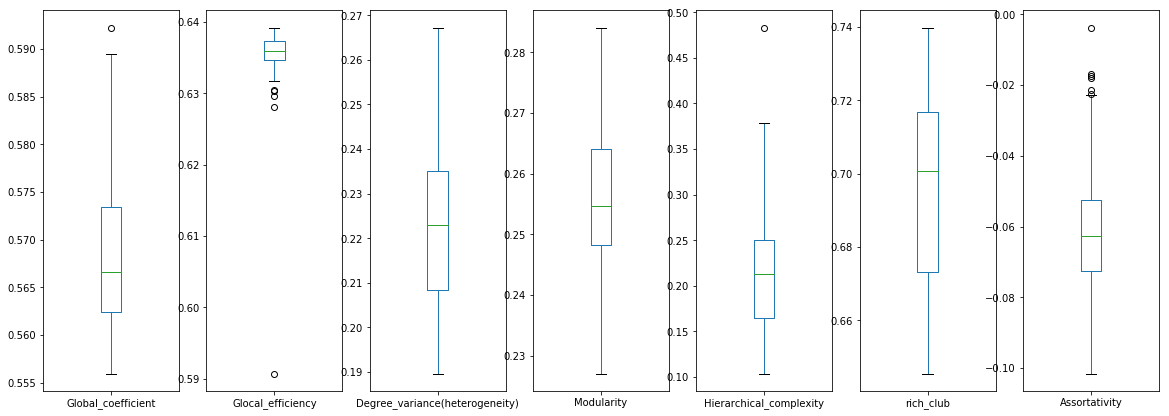

In [24]:
# box and whisker plots
data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize = (20,7))
pyplot.show()

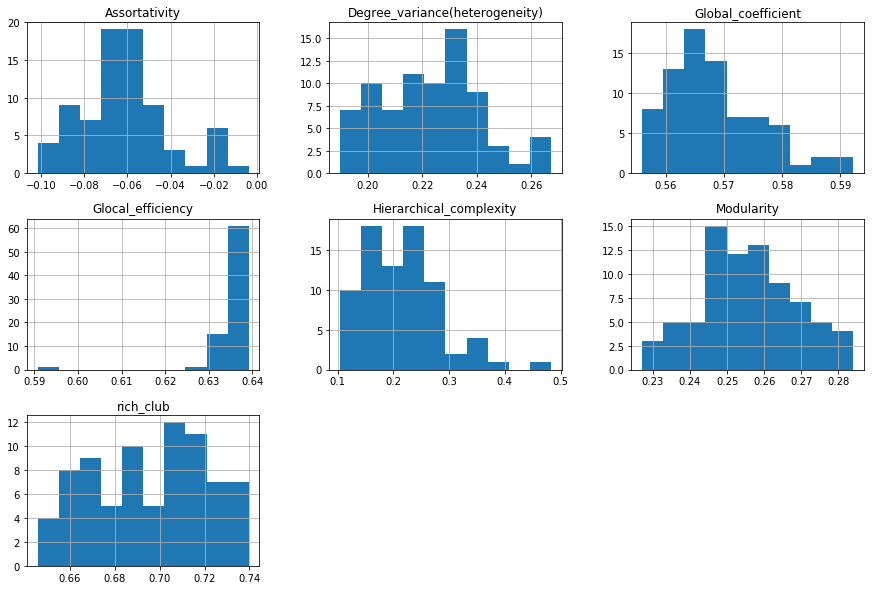

In [25]:
# histograms
data.hist(figsize = (15,10))
pyplot.show()
